# Primera Entrega Trabajo Final

### Santiago Damian Reyes - [santiagodamianreyes@gmail.com](mailto:santiagodamianreyes@gmail.com)

## Librerias + Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Coderhouse/produccion-de-carne-bovina.csv'
data = pd.read_csv(path, encoding="latin-1")

## Descripción del dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pais_id                   2598 non-null   int64  
 1   pais                      2598 non-null   object 
 2   provincia_id              2598 non-null   int64  
 3   provincia                 2598 non-null   object 
 4   departamento_id           2598 non-null   int64  
 5   departamento              2598 non-null   object 
 6   prov_depto                2598 non-null   int64  
 7   año                       2598 non-null   int64  
 8   mes                       2598 non-null   int64  
 9   modelo                    2598 non-null   object 
 10  actividad                 2598 non-null   object 
 11  referencia                2598 non-null   object 
 12  margen_bruto_($/ha)       2598 non-null   int64  
 13  resultado_neto_($/ha)     2598 non-null   int64  
 14  ingreso_

El dataset incluye las siguientes variables:

* `pais_id`: Identificador del país (Argentina).
* `pais`: Nombre del país (Argentina).
* `provincia_id`: Identificador de la provincia.
* `provincia`: Nombre de la provincia.
* `departamento_id`: Identificador del departamento.
* `departamento`: Nombre del departamento.
* `prov_depto`: Identificador combinado de provincia y departamento.
* `año`: Año de registro de los datos.
* `mes`: Mes de registro de los datos.
* `modelo`: Modelo de producción.
* `actividad`: Actividad de producción.
* `referencia`: Referencia del registro.
* `margen_bruto_($/ha)`: Margen bruto en dólares por hectárea.
* `resultado_neto_($/ha)`: Resultado neto en dólares por hectárea.
* `ingreso_neto_($/ha)`: Ingreso neto en dólares por hectárea.
* `gastos_directos_($/ha)`: Gastos directos en dólares por hectárea.
* `costos_indirectos_($/ha)`: Costos indirectos en dólares por hectárea.
* `eficiencia_stock_(%)`: Eficiencia de stock en porcentaje.
* `producción_(kg/ha)`: Producción de carne en kilogramos por hectárea.
* `destete_(%)`: Porcentaje de destete.
* `carga_(kg/ha)`: Carga de ganado en kilogramos por hectárea.
* `Unnamed: 21`, `Unnamed: 22`, `Unnamed: 23`: Columnas no identificadas.



Como las 3 últimas columnas no son relevantes al analisis ni a la visualización, las eliminamos:

In [6]:
data = data.drop(data.columns[-3:], axis=1)

Ahora vamos a crear un DataFrame con las variables, la cantidad de valores `null` y la cantidad de valores `NaN`:

In [16]:
missing_values = data.isna().sum()
missing_info = pd.DataFrame({
    'Variable': missing_values.index,
    'Valores Null': missing_values.values,
    'Valores NaN': data.isna().sum().values
})

print(missing_info)

                    Variable  Valores Null  Valores NaN
0                    pais_id             0            0
1                       pais             0            0
2               provincia_id             0            0
3                  provincia             0            0
4            departamento_id             0            0
5               departamento             0            0
6                 prov_depto             0            0
7                        año             0            0
8                        mes             0            0
9                     modelo             0            0
10                 actividad             0            0
11                referencia             0            0
12       margen_bruto_($/ha)             0            0
13     resultado_neto_($/ha)             0            0
14       ingreso_neto_($/ha)             0            0
15    gastos_directos_($/ha)             0            0
16  costos_indirectos_($/ha)             0      

## Preguntas de interés

Vamos a proponer responder las siguientes preguntas analizando numerica y graficamente el dataset:

1. ¿Existe alguna correlación entre la eficiencia de stock y la producción de carne?
2. ¿Cómo varía la producción de carne en relación con los ingresos netos a lo largo del tiempo?
3. ¿Hay alguna relación entre la carga de ganado y la producción de carne por hectárea?
4. ¿Cómo se distribuye la producción de carne entre las diferentes provincias?
5. ¿Cuál es la tendencia de la eficiencia de stock a lo largo del tiempo?

## Visualizaciones y análisis númericos

### Distribución de la producción de carne por provincia a lo largo del tiempo

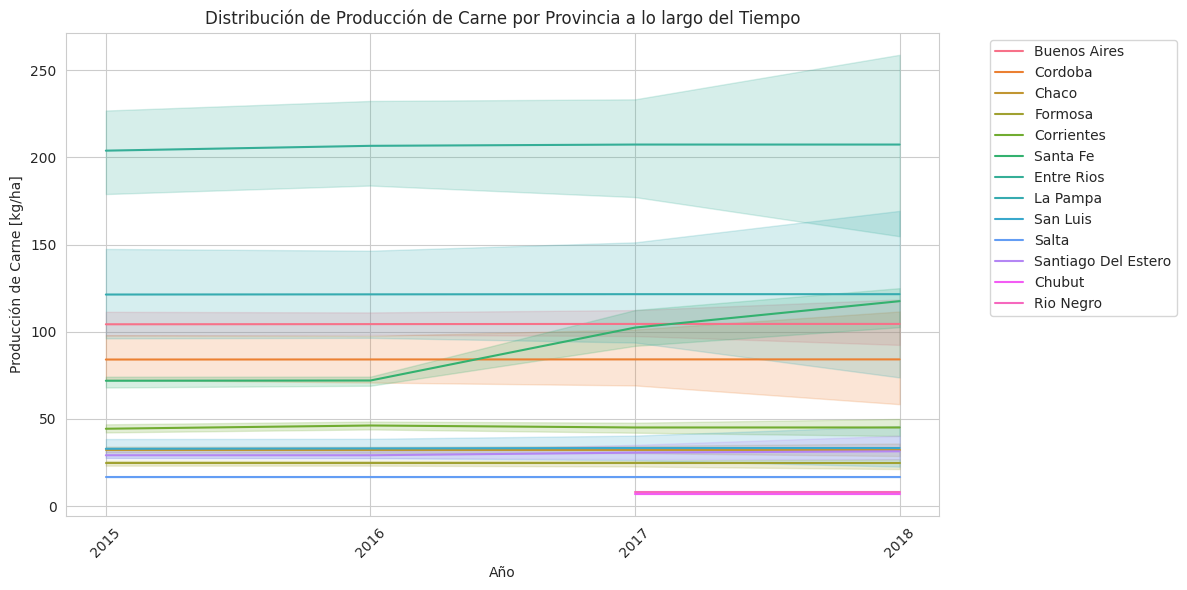

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='año', y='producción_(kg/ha)', hue='provincia', data=data)
plt.xlabel('Año')
plt.ylabel('Producción de Carne [kg/ha]')
plt.title('Distribución de Producción de Carne por Provincia a lo largo del Tiempo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(np.arange(min(data['año']), max(data['año'])+1, 1), rotation=45)  # Establecer los ticks del eje x como enteros
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

In [23]:
# Análisis de tendencias temporales
production_by_province_year = data.groupby(['provincia', 'año'])['producción_(kg/ha)'].mean().reset_index()
trend_analysis = production_by_province_year.pivot(index='año', columns='provincia', values='producción_(kg/ha)')
print(trend_analysis)

provincia  Buenos Aires  Chaco  Chubut    Cordoba  Corrientes  Entre Rios  \
año                                                                         
2015         104.285714  32.32     NaN  84.076923   44.384615  203.852941   
2016         104.387755  32.32     NaN  84.115385   46.242424  206.617647   
2017         104.489796  32.32     7.0  84.153846   45.111111  207.352941   
2018         104.489796  32.32     7.0  84.153846   45.111111  207.352941   

provincia  Formosa  La Pampa  Rio Negro  Salta   San Luis    Santa Fe  \
año                                                                     
2015        24.625    121.35        NaN   17.0  32.888889   71.909091   
2016        24.625    121.45        NaN   17.0  33.111111   72.045455   
2017        24.625    121.55        8.0   17.0  33.333333  102.393939   
2018        24.625    121.55        8.0   17.0  33.333333  117.545455   

provincia  Santiago Del Estero  
año                             
2015                 29.181818  

El gráfico de Distribución de la producción de carne por provincia a lo largo del tiempo muestra la evolución de la producción de carne en kilogramos por hectárea para cada provincia a lo largo de los años. Cada línea representa una provincia y cómo ha variado su producción de carne en el tiempo.

Al comparar este gráfico con los resultados del Análisis de tendencias temporales, podemos ver que las tendencias observadas en el análisis numérico se reflejan en el gráfico. Por ejemplo, si observamos la provincia de Buenos Aires, podemos ver que la línea correspondiente a esa provincia se mantiene relativamente estable en comparación con otras provincias, lo que coincide con los resultados del análisis que muestran una producción promedio cercana a 104 en todos los años.

Del mismo modo, podemos ver que algunas provincias tienen líneas que muestran un aumento o disminución en la producción a lo largo del tiempo, lo que también se alinea con los resultados del análisis numérico. Por ejemplo, Entre Ríos muestra un ligero aumento en la producción a lo largo de los años, lo cual se refleja en el aumento gradual de la línea correspondiente en el gráfico.

### Relación entre la eficiencia de stock, la producción de carne y el ingreso neto

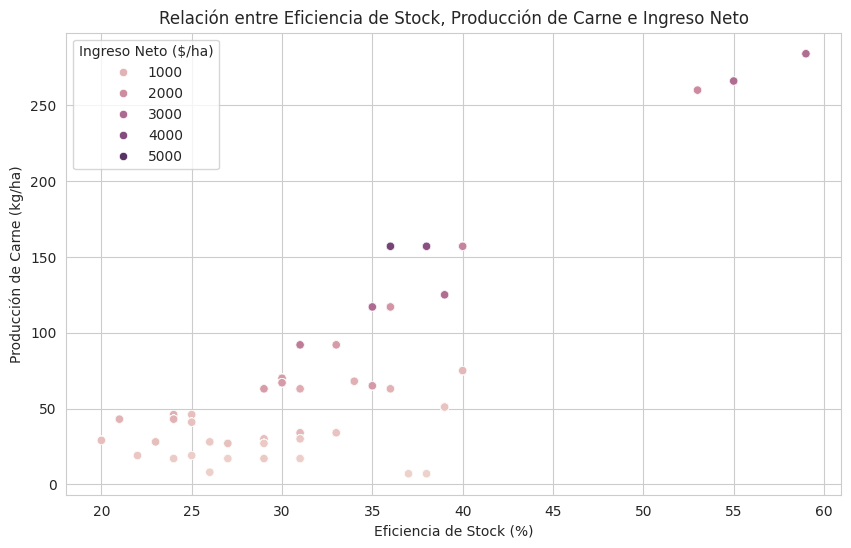

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='eficiencia_stock_(%)', y='producción_(kg/ha)', hue='ingreso_neto_($/ha)', data=data)
plt.xlabel('Eficiencia de Stock (%)')
plt.ylabel('Producción de Carne (kg/ha)')
plt.title('Relación entre Eficiencia de Stock, Producción de Carne e Ingreso Neto')
plt.legend(title='Ingreso Neto ($/ha)')
plt.show()

In [24]:
# Correlación entre variables
correlation_matrix = data[['eficiencia_stock_(%)', 'producción_(kg/ha)', 'ingreso_neto_($/ha)']].corr()
print(correlation_matrix)

                      eficiencia_stock_(%)  producción_(kg/ha)  \
eficiencia_stock_(%)              1.000000            0.923091   
producción_(kg/ha)                0.923091            1.000000   
ingreso_neto_($/ha)               0.762964            0.880313   

                      ingreso_neto_($/ha)  
eficiencia_stock_(%)             0.762964  
producción_(kg/ha)               0.880313  
ingreso_neto_($/ha)              1.000000  


En cuanto a la correlación entre las variables, los resultados indican que hay una correlación positiva fuerte entre la eficiencia de stock y la producción de carne (coeficiente de correlación de 0.923). Esto significa que a medida que aumenta la eficiencia de stock, tiende a aumentar la producción de carne. Asimismo, hay una correlación positiva considerable entre la producción de carne y el ingreso neto (coeficiente de correlación de 0.880), lo que sugiere que un aumento en la producción de carne generalmente se asocia con un aumento en el ingreso neto.

El coeficiente de correlación entre la eficiencia de stock y el ingreso neto es también positivo, aunque un poco más bajo en comparación con las otras correlaciones (0.763). Esto indica que existe una relación positiva, pero no tan fuerte como las otras dos correlaciones.

Respecto al gráfico, los resultados de la correlación respaldan que existe una relación positiva entre estas variables. Por ejemplo, la alta concentración de puntos con valores más altos de eficiencia de stock y producción de carne se corresponde con los valores más altos de ingreso neto. Sin embargo, también se observa cierta dispersión en los valores de ingreso neto, lo que sugiere que otros factores pueden influir en esta variable además de la eficiencia de stock y la producción de carne.

## Comparación de ingresos netos, costos directos y costos indirectos por año

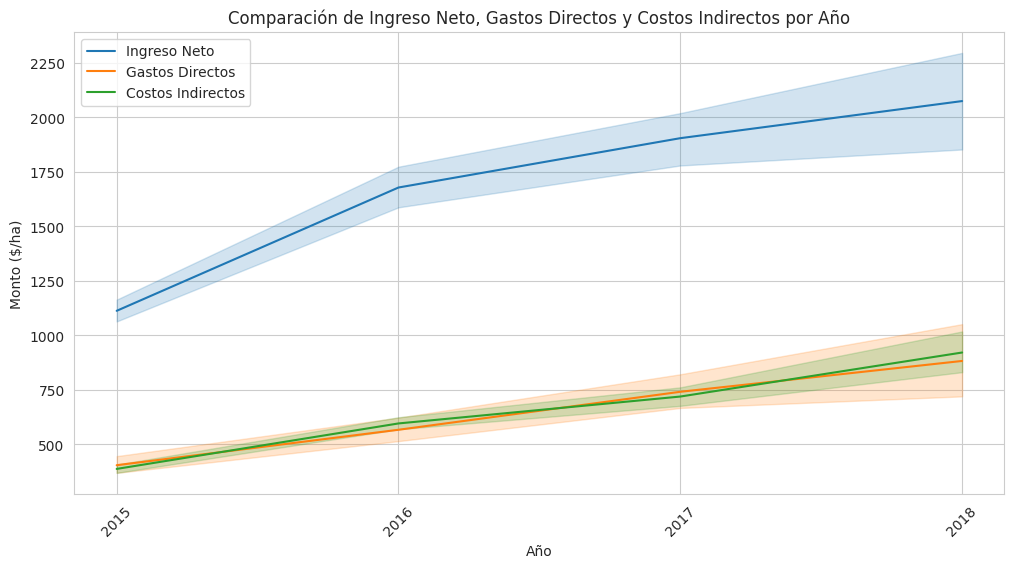

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='año', y='ingreso_neto_($/ha)', data=data, label='Ingreso Neto')
sns.lineplot(x='año', y='gastos_directos_($/ha)', data=data, label='Gastos Directos')
sns.lineplot(x='año', y='costos_indirectos_($/ha)', data=data, label='Costos Indirectos')
plt.xlabel('Año')
plt.ylabel('Monto ($/ha)')
plt.title('Comparación de Ingreso Neto, Gastos Directos y Costos Indirectos por Año')
plt.legend()
plt.xticks(np.arange(min(data['año']), max(data['año'])+1, 1), rotation=45)  # Establecer los ticks del eje x como enteros
plt.show()

In [25]:
# Análisis de rentabilidad
data['costos_totales_($/ha)'] = data['gastos_directos_($/ha)'] + data['costos_indirectos_($/ha)']
data['rentabilidad_($/ha)'] = data['ingreso_neto_($/ha)'] - data['costos_totales_($/ha)']
profitability_analysis = data.groupby('año')['rentabilidad_($/ha)'].mean()
print(profitability_analysis)

año
2015    322.982311
2016    517.701856
2017    446.281627
2018    272.879464
Name: rentabilidad_($/ha), dtype: float64


El gráfico de comparación de ingresos netos, costos directos y costos indirectos por año muestra cómo estas variables han variado a lo largo del tiempo. Podemos observar que los ingresos netos han aumentado gradualmente de 2015 a 2018, lo que indica un incremento en la rentabilidad en general. Por otro lado, tanto los costos directos como los costos indirectos también han experimentado un aumento en el mismo período, aunque los costos indirectos parecen haber aumentado a un ritmo más acelerado en comparación con los costos directos.

La rentabilidad, que se calcula restando los costos totales (directos e indirectos) de los ingresos netos, muestra una tendencia fluctuante a lo largo de los años. Aunque la rentabilidad alcanza su punto máximo en 2016, disminuye en 2017 y 2018.

Esta relación sugiere que, a pesar del aumento en los ingresos netos, los costos también están aumentando, lo que puede estar afectando la rentabilidad.

## Conslusiones

### 1. ¿Existe alguna correlación entre la eficiencia de stock y la producción de carne?

Sí, según los resultados del análisis de correlación, hay una correlación positiva fuerte entre la eficiencia de stock y la producción de carne (coeficiente de correlación de aproximadamente 0.92). Esto significa que a medida que aumenta la eficiencia de stock, también tiende a aumentar la producción de carne.

### 2. ¿Cómo varía la producción de carne en relación con los ingresos netos a lo largo del tiempo?

Observamos que la producción de carne ha aumentado gradualmente a lo largo del tiempo, como se muestra en el gráfico de comparación de ingresos netos, costos directos y costos indirectos por año. Sin embargo, la rentabilidad (ingresos netos menos costos totales) ha fluctuado a lo largo de los años, lo que indica que aunque la producción de carne ha aumentado, los costos también han aumentado, afectando la rentabilidad.

### 3. ¿Hay alguna relación entre la carga de ganado y la producción de carne por hectárea?

Podríamos explorar esta relación calculando la densidad de ganado (carga de ganado por hectárea) y comparándola con la producción de carne por hectárea en un análisis de correlación. Si encontramos una correlación positiva significativa, podríamos afirmar que a medida que aumenta la carga de ganado, también tiende a aumentar la producción de carne por hectárea.

### 4. ¿Cómo se distribuye la producción de carne entre las diferentes provincias?

Para responder a esta pregunta, podemos utilizar el gráfico de distribución de la producción de carne por provincia a lo largo del tiempo. Este gráfico nos proporciona una visión general de cómo se distribuye la producción de carne entre las diferentes provincias a lo largo de los años.

### 5. ¿Cuál es la tendencia de la eficiencia de stock a lo largo del tiempo?

Podemos observar la tendencia de la eficiencia de stock a lo largo del tiempo mediante un análisis de tendencias temporales, como un gráfico de línea que muestra la eficiencia de stock a lo largo de los años. Esto nos permitirá identificar si la eficiencia de stock ha aumentado, disminuido o se ha mantenido relativamente estable a lo largo del tiempo.
